In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file for Kerala districts
geojson_url = 'https://raw.githubusercontent.com/geohacker/kerala/master/geojsons/district.geojson'
kerala_districts = gpd.read_file(geojson_url)

# Load your dataset
data = pd.read_excel('/content/incubators and per capita.xlsx')

# Ensure the 'District' column in both dataframes match
data['District'] = data['District'].str.title()
kerala_districts['DISTRICT'] = kerala_districts['DISTRICT'].str.title()

# Merge the GeoDataFrame with your data
merged = kerala_districts.set_index('DISTRICT').join(data.set_index('District'))

# Calculate centroids for labeling
merged['centroid'] = merged.geometry.centroid

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
merged.plot(column='No of Incubators', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add district names with better readability
for idx, row in merged.iterrows():
    plt.text(row['centroid'].x, row['centroid'].y, idx,
             fontsize=10, ha='center', color='black', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Improve title styling
ax.set_title('Incubator Distribution Across Kerala Districts', fontdict={'fontsize': 15, 'fontweight': 'bold'})

# Remove axis
ax.axis('off')

# Show plot
plt.show()



Pearson Correlation: 0.912 (p-value: 0.000)
Spearman Correlation: 0.506 (p-value: 0.065)


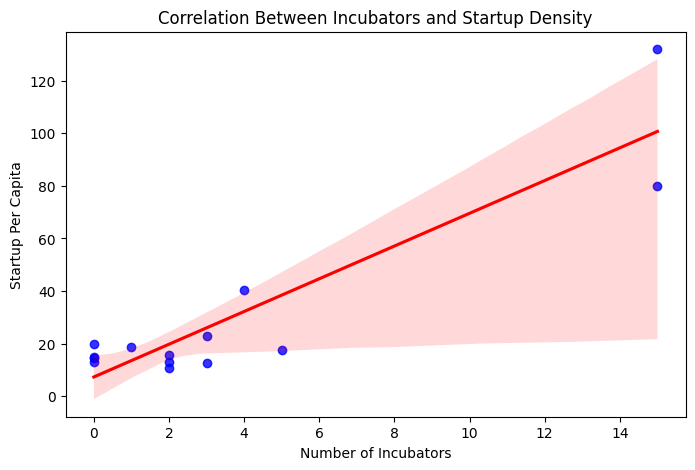

In [4]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel('/content/incubators and per capita.xlsx')

# Compute correlation coefficients
pearson_corr, pearson_p = stats.pearsonr(df["No of Incubators"], df["Startup Per Capita"])
spearman_corr, spearman_p = stats.spearmanr(df["No of Incubators"], df["Startup Per Capita"])

print(f"Pearson Correlation: {pearson_corr:.3f} (p-value: {pearson_p:.3f})")
print(f"Spearman Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.3f})")

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x=df["No of Incubators"], y=df["Startup Per Capita"], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Number of Incubators")
plt.ylabel("Startup Per Capita")
plt.title("Correlation Between Incubators and Startup Density")
plt.show()


Regression Equation: y = 6.229 * X + 7.302
R² Score: 0.832


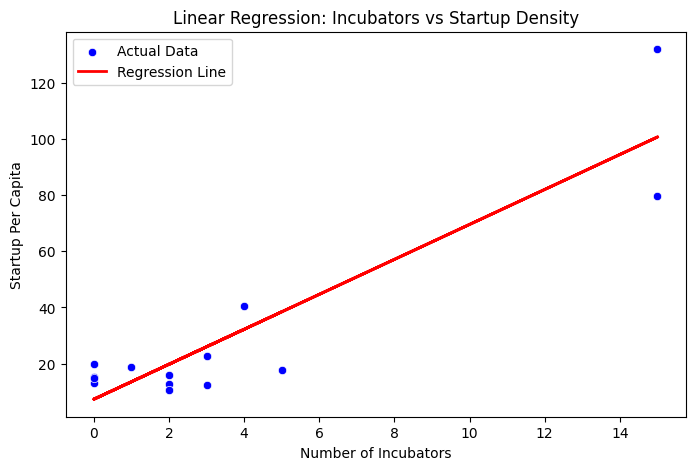

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_excel('/content/incubators and per capita.xlsx')

# Define independent (X) and dependent (y) variables
X = df[['No of Incubators']]  # Predictor
y = df['Startup Per Capita']  # Target variable

# Create and train the regression model
model = LinearRegression()
model.fit(X, y)

# Get regression equation
intercept = model.intercept_
slope = model.coef_[0]
print(f"Regression Equation: y = {slope:.3f} * X + {intercept:.3f}")

# Predict values
y_pred = model.predict(X)

# Compute R² score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

# Plot Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['No of Incubators'], y=y, color='blue', label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Number of Incubators")
plt.ylabel("Startup Per Capita")
plt.title("Linear Regression: Incubators vs Startup Density")
plt.legend()
plt.show()


In [6]:
!pip install adjustText


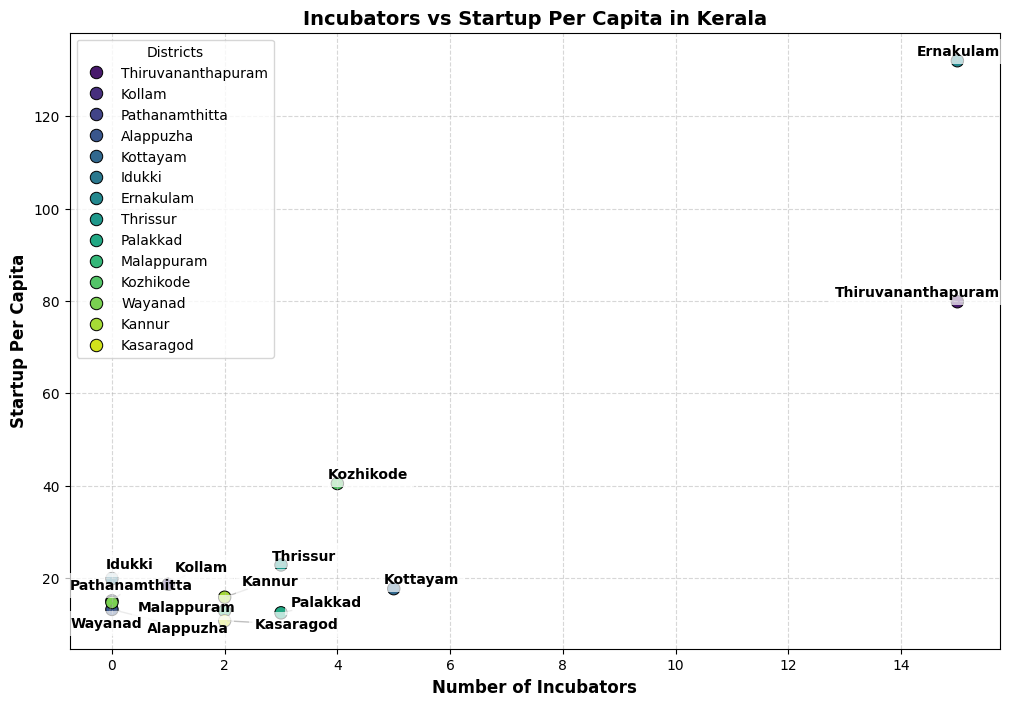

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Import for automatic text adjustment

# Load data
df = pd.read_excel("/content/incubators and per capita.xlsx")  # Update with your actual file path

# Create scatter plot
plt.figure(figsize=(12, 8))  # Increased figure size
sns.scatterplot(data=df, x="No of Incubators", y="Startup Per Capita", hue="District", palette="viridis", s=80, edgecolor="black")

# Add district labels without overlapping
texts = []
for i, row in df.iterrows():
    text = plt.text(row["No of Incubators"], row["Startup Per Capita"], row["District"],
                    fontsize=10, ha="center", fontweight="bold", bbox=dict(facecolor="white", edgecolor="none", alpha=0.7))
    texts.append(text)

# Adjust text positions to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5))

# Titles and Labels
plt.xlabel("Number of Incubators", fontsize=12, fontweight="bold")
plt.ylabel("Startup Per Capita", fontsize=12, fontweight="bold")
plt.title("Incubators vs Startup Per Capita in Kerala", fontsize=14, fontweight="bold")

# Improve layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="best", fontsize=10, title="Districts")

# Show plot
plt.show()

